In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [193]:
df = pd.read_csv("customer_support_tickets.csv")

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [195]:
df['Customer Satisfaction Rating'].describe()

count    2769.000000
mean        2.991333
std         1.407016
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Customer Satisfaction Rating, dtype: float64

In [196]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [197]:
df.isna().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [198]:
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

In [199]:
df['Time to Resolution'] = df['Time to Resolution'].fillna(df['Time to Resolution'].median())

In [200]:
df = df.dropna(subset=['First Response Time'])

In [201]:
df[df['Resolution'].isna()].tail()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8447,8448,Devin Parsons,jonathanfox@example.org,51,Other,GoPro Hero,2020-07-12,Refund request,Installation support,There seems to be a hardware problem with my {...,Pending Customer Response,NaN,Critical,Email,2023-06-01 18:00:58,2023-06-01 11:17:48,NaN
8449,8450,Kyle Roy,maldonadosharon@example.org,28,Other,Dyson Vacuum Cleaner,2020-11-22,Refund request,Display issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Social media,2023-06-01 19:11:01,2023-06-01 11:17:48,NaN
8454,8455,Jill Leon,murrayanna@example.org,51,Female,Samsung Galaxy,2020-03-11,Cancellation request,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Email,2023-06-01 12:24:06,2023-06-01 11:17:48,NaN
8458,8459,Adam Nunez,gregory69@example.net,47,Other,Amazon Echo,2020-07-28,Billing inquiry,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Medium,Chat,2023-06-01 17:26:11,2023-06-01 11:17:48,NaN
8462,8463,Shelby Douglas,rhendrix@example.net,49,Female,Samsung Soundbar,2020-10-21,Refund request,Display issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Email,2023-06-02 00:36:18,2023-06-01 11:17:48,NaN


In [202]:
df[(df['Resolution'].isna()) & (df['Ticket Status'] != 'Pending Customer Response')]

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating


In [203]:
df.loc[:, 'Resolution'] = df['Resolution'].fillna('No Resolution')

In [204]:
df[(df['Customer Satisfaction Rating'].isna()) & (df['Ticket Type'] != 'Pending Customer Response')]

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Low,Social media,2023-06-01 10:32:47,2023-06-01 11:17:48,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,No Resolution,Critical,Phone,2023-06-01 09:25:48,2023-06-01 11:17:48,NaN
12,13,Tamara Hahn,jensenwilliam@example.net,27,Other,Nintendo Switch Pro Controller,2021-05-26,Technical issue,Hardware issue,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Low,Chat,2023-06-01 19:03:53,2023-06-01 11:17:48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,8448,Devin Parsons,jonathanfox@example.org,51,Other,GoPro Hero,2020-07-12,Refund request,Installation support,There seems to be a hardware problem with my {...,Pending Customer Response,No Resolution,Critical,Email,2023-06-01 18:00:58,2023-06-01 11:17:48,NaN
8449,8450,Kyle Roy,maldonadosharon@example.org,28,Other,Dyson Vacuum Cleaner,2020-11-22,Refund request,Display issue,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,High,Social media,2023-06-01 19:11:01,2023-06-01 11:17:48,NaN
8454,8455,Jill Leon,murrayanna@example.org,51,Female,Samsung Galaxy,2020-03-11,Cancellation request,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Low,Email,2023-06-01 12:24:06,2023-06-01 11:17:48,NaN
8458,8459,Adam Nunez,gregory69@example.net,47,Other,Amazon Echo,2020-07-28,Billing inquiry,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Medium,Chat,2023-06-01 17:26:11,2023-06-01 11:17:48,NaN


In [205]:
df[df['Customer Satisfaction Rating'].isna()]['Resolution'].value_counts()

Resolution
No Resolution    2881
Name: count, dtype: int64

In [206]:
df['Customer Satisfaction Rating'].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

In [207]:
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(0)

In [208]:
df.isna().any().sum()

0

---Untill here: dealing with missing data.

In [209]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,0.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [210]:
# Assuming 'Time to Resolution' is a datetime column
reference_date = pd.to_datetime("2023-06-01")

# If 'Time to Resolution' is a datetime, subtract it from a reference date
df['Time to Resolution'] = df['Time to Resolution'] - reference_date

In [211]:
df['Formatted Time to Resolution'] = df['Time to Resolution'].dt.components.apply(
    lambda x: f"{int(x.hours):02}:{int(x.minutes):02}:{int(x.seconds):02}", axis=1
)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5650 entries, 0 to 8467
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Ticket ID                     5650 non-null   int64          
 1   Customer Name                 5650 non-null   object         
 2   Customer Email                5650 non-null   object         
 3   Customer Age                  5650 non-null   int64          
 4   Customer Gender               5650 non-null   object         
 5   Product Purchased             5650 non-null   object         
 6   Date of Purchase              5650 non-null   datetime64[ns] 
 7   Ticket Type                   5650 non-null   object         
 8   Ticket Subject                5650 non-null   object         
 9   Ticket Description            5650 non-null   object         
 10  Ticket Status                 5650 non-null   object         
 11  Resolution            

In [213]:
df['Resolution Hours'] = df['Time to Resolution'].dt.total_seconds() / 3600

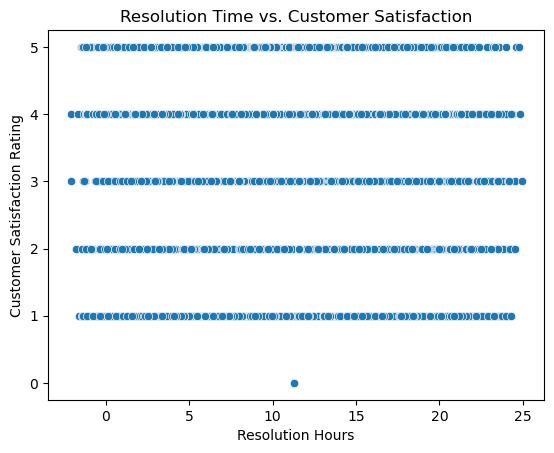

In [214]:
sns.scatterplot(x='Resolution Hours', y='Customer Satisfaction Rating', data=df)
plt.title('Resolution Time vs. Customer Satisfaction')
plt.show()

In [215]:
df['Ticket Priority'].value_counts()

Ticket Priority
Medium      1465
Critical    1437
High        1381
Low         1367
Name: count, dtype: int64

In [216]:
# Mapping the 'Ticket Priority' values to numerical ones
priority_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Critical': 4
}

# Apply the mapping to the 'Ticket Priority' column
df['Ticket Priority'] = df['Ticket Priority'].map(priority_mapping)

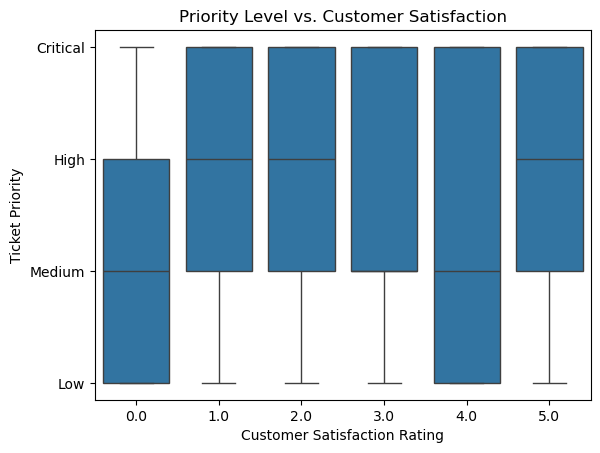

In [217]:
sns.boxplot(x='Customer Satisfaction Rating', 
            y='Ticket Priority', 
            data=df)
plt.title('Priority Level vs. Customer Satisfaction')
plt.yticks([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Critical'])  # Relabel the y-axis
plt.show()

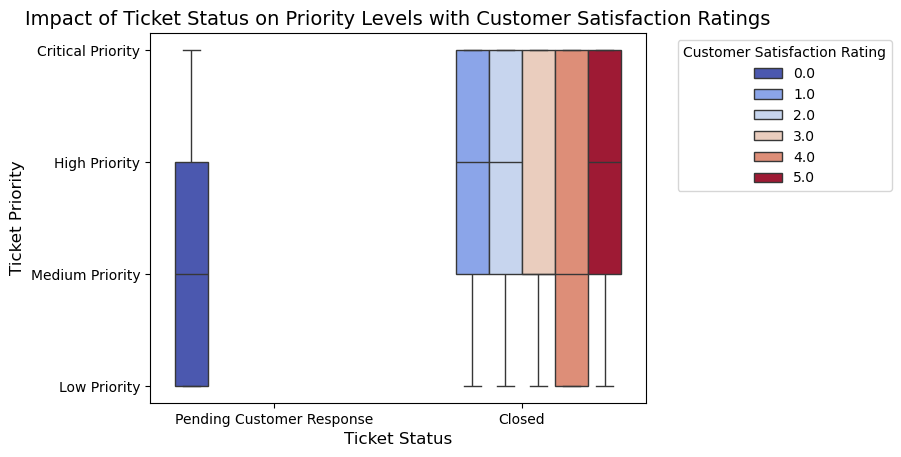

In [218]:
# Create the boxplot with enhancements
sns.boxplot(x='Ticket Status', 
            y='Ticket Priority', 
            data=df, 
            hue='Customer Satisfaction Rating', 
            palette='coolwarm')  # You can use a more intuitive color palette

# Add a descriptive title
plt.title('Impact of Ticket Status on Priority Levels with Customer Satisfaction Ratings', fontsize=14)

# Relabel the y-axis with more detailed information
plt.yticks([1, 2, 3, 4], ['Low Priority', 'Medium Priority', 'High Priority', 'Critical Priority'])

# Add axis labels for clarity
plt.xlabel('Ticket Status', fontsize=12)
plt.ylabel('Ticket Priority', fontsize=12)

# Add a legend title to clarify what the colors represent
plt.legend(title='Customer Satisfaction Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

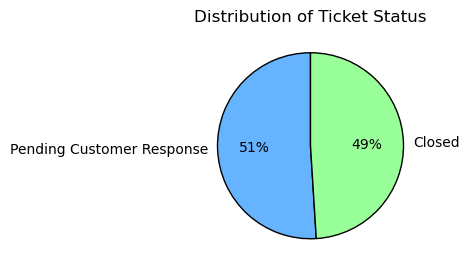

In [219]:
# Calculate the counts for each ticket status
ticket_status_counts = df['Ticket Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 5))  # Set the figure size
plt.pie(ticket_status_counts, 
        labels=ticket_status_counts.index,  # Ticket status names
        autopct='%1.0f%%',  # Show percentages
        startangle=90,  # Rotate the start angle of the pie
        colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'],  # Custom colors (optional)
        wedgeprops={'edgecolor': 'black'})  # Add a black border to each wedge

# Add a title
plt.title('Distribution of Ticket Status')

# Show the pie chart
plt.show()

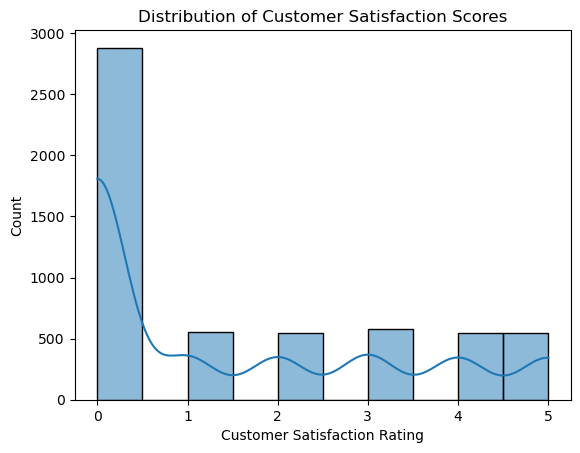

In [220]:
sns.histplot(df['Customer Satisfaction Rating'], kde=True, bins=10)
plt.title('Distribution of Customer Satisfaction Scores')
plt.show()

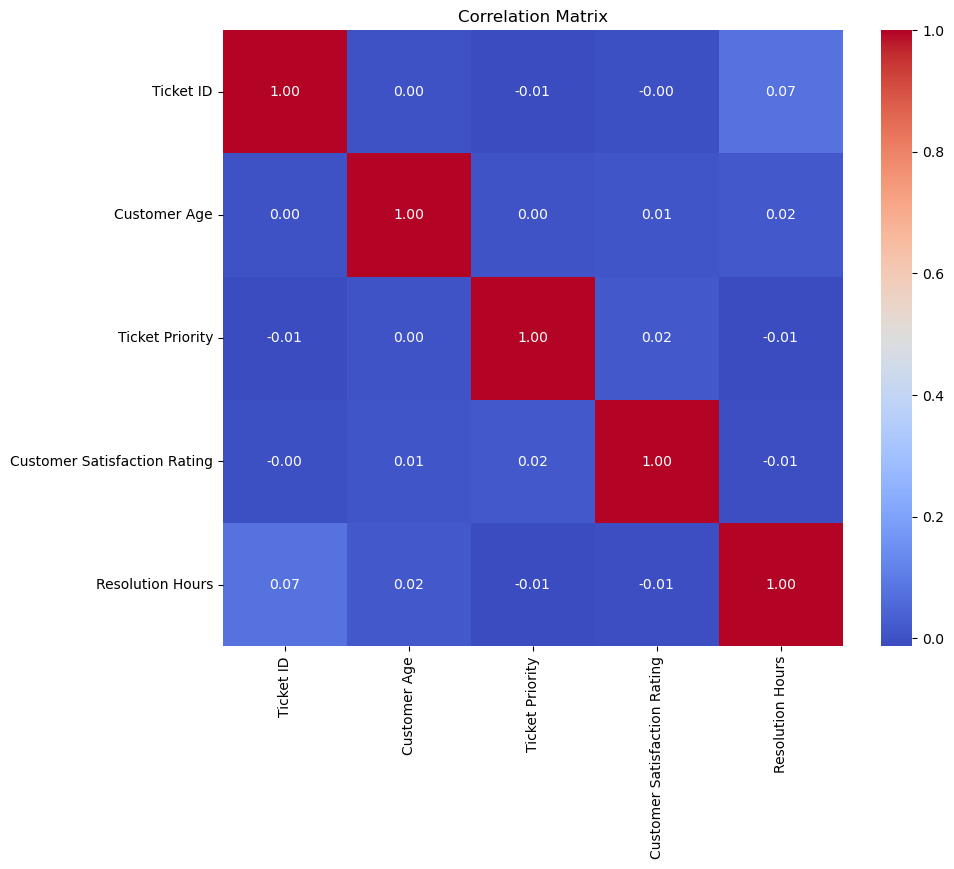

In [221]:
# Selecting only numeric columns from the DataFrame
df1 = df.copy()
df1.drop(columns=['Time to Resolution'], inplace=True)  # Drop the column in place

numeric_df = df1.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [222]:
df1

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Customer Satisfaction Rating,Formatted Time to Resolution,Resolution Hours
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,4,Social media,2023-06-01 12:15:36,0.0,11:17:48,11.296667
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,4,Chat,2023-06-01 16:45:38,0.0,11:17:48,11.296667
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,1,Social media,2023-06-01 11:14:38,3.0,18:05:38,18.093889
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,1,Social media,2023-06-01 07:29:40,3.0,01:57:40,1.961111
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,1,Email,2023-06-01 00:12:42,1.0,19:53:42,19.895000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,8456,Ariel Lee,thompsonsamuel@example.org,54,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,Say position key appear behavior.,3,Email,2023-06-01 14:15:07,1.0,06:58:07,6.968611
8458,8459,Adam Nunez,gregory69@example.net,47,Other,Amazon Echo,2020-07-28,Billing inquiry,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,2,Chat,2023-06-01 17:26:11,0.0,11:17:48,11.296667
8462,8463,Shelby Douglas,rhendrix@example.net,49,Female,Samsung Soundbar,2020-10-21,Refund request,Display issue,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,4,Email,2023-06-02 00:36:18,0.0,11:17:48,11.296667
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,3,Social media,2023-06-01 09:44:22,3.0,04:31:22,4.522778


In [223]:
df['interaction_frequency'] = df.groupby('Customer Name')['Ticket ID'].transform('count')

In [224]:
filtered_df = df[df['interaction_frequency'] > 1]

In [225]:
filtered_df.shape

(391, 20)

In [226]:
random_forest_df = df1.copy()
random_forest_df['Customer Satisfaction Rating'].astype(int)
random_forest_df['churned_customer'] = random_forest_df['Customer Satisfaction Rating'] <= 1

In [227]:
random_forest_df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Customer Satisfaction Rating',
       'Formatted Time to Resolution', 'Resolution Hours', 'churned_customer'],
      dtype='object')

In [228]:
# Mapping the 'Ticket Priority' values to numerical ones
gender_mapping = {
    'Male': 1,
    'Female': 2,
    'Other': 3
}

# Apply the mapping to the 'Ticket Priority' column
random_forest_df['Customer Gender'] = random_forest_df['Customer Gender'].map(gender_mapping)

In [229]:
random_forest_df['Customer Gender'].value_counts()

Customer Gender
2    1941
1    1907
3    1802
Name: count, dtype: int64

In [230]:
random_forest_df['Ticket Status'].value_counts()

Ticket Status
Pending Customer Response    2881
Closed                       2769
Name: count, dtype: int64

In [231]:
ticket_status_mapping = {
    'Pending Customer Response': 0,
    'Closed': 1
}

random_forest_df['Ticket Status'] = random_forest_df['Ticket Status'].map(ticket_status_mapping)

In [232]:
random_forest_df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Customer Satisfaction Rating,Formatted Time to Resolution,Resolution Hours,churned_customer
0,1,Marisa Obrien,carrollallison@example.com,32,3,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,0,No Resolution,4,Social media,2023-06-01 12:15:36,0.0,11:17:48,11.296667,True
1,2,Jessica Rios,clarkeashley@example.com,42,2,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,0,No Resolution,4,Chat,2023-06-01 16:45:38,0.0,11:17:48,11.296667,True
2,3,Christopher Robbins,gonzalestracy@example.com,48,3,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,1,Case maybe show recently my computer follow.,1,Social media,2023-06-01 11:14:38,3.0,18:05:38,18.093889,False
3,4,Christina Dillon,bradleyolson@example.org,27,2,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,1,Try capital clearly never color toward story.,1,Social media,2023-06-01 07:29:40,3.0,01:57:40,1.961111,False
4,5,Alexander Carroll,bradleymark@example.com,67,2,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,1,West decision evidence bit.,1,Email,2023-06-01 00:12:42,1.0,19:53:42,19.895000,True


In [233]:
columns_to_keep = ['Ticket Priority', 'Resolution Hours', 'Customer Age','Customer Gender','Ticket Status']
# Feature-target split
X = random_forest_df[columns_to_keep]
y = random_forest_df['churned_customer']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.95      0.86       645
        True       0.96      0.84      0.90      1050

    accuracy                           0.88      1695
   macro avg       0.87      0.89      0.88      1695
weighted avg       0.90      0.88      0.88      1695



#### Precision:

False (0.78): When the model predicts that a customer will not churn, it is correct 78% of the time.
True (0.96): When the model predicts that a customer will churn, it is correct 96% of the time.
Overall Interpretation: High precision for the 'True' class indicates that the model is very good at correctly identifying customers who are likely to churn.

#### Recall:

False (0.94): Out of all actual non-churning customers, the model correctly identified 94% of them.
True (0.84): Out of all actual churning customers, the model correctly identified 84% of them.
Overall Interpretation: A high recall for 'False' suggests that the model is effective in identifying most customers who will not churn, while the recall for 'True' indicates that there’s still room for improvement in detecting churning customers.

#### F1-Score:

False (0.86): This score is the harmonic mean of precision and recall for the 'False' class, indicating a balance between the two metrics.
True (0.90): Similarly, this score indicates a strong balance for the 'True' class.
Overall Interpretation: The F1-scores for both classes are quite good, especially for 'True', which indicates a solid model performance.

#### Support:

This indicates the number of actual occurrences of each class in the specified dataset.
False (645): There were 645 instances where customers did not churn.
True (1050): There were 1050 instances where customers did churn.
Overall Interpretation: There are more churning customers than non-churning ones, which could affect the model's performance metrics.
#### Accuracy:

Overall Accuracy (0.88): This indicates that 88% of the total predictions made by the model were correct.
Overall Interpretation: A high accuracy indicates a generally good performance of the model.

#### Macro Avg and Weighted Avg:

Macro Avg: This is the average of the precision, recall, and F1 scores for each class, treating all classes equally.
Weighted Avg: This average accounts for the number of true instances for each class, which provides a better representation when class distributions are imbalanced.

Overall Interpretation: The values here indicate that the model performs well across both classes.




In [234]:
# Prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Evaluation
print(f"AUC Score: {auc_score:.2f}")

# Classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

AUC Score: 0.91
              precision    recall  f1-score   support

       False       0.78      0.95      0.86       645
        True       0.96      0.84      0.90      1050

    accuracy                           0.88      1695
   macro avg       0.87      0.89      0.88      1695
weighted avg       0.90      0.88      0.88      1695



Interpretation: An AUC of 0.91 indicates that the model has a strong ability to distinguish between the two classes (churned and non-churned customers). A score close to 1.0 signifies that the model can effectively separate positive and negative cases.

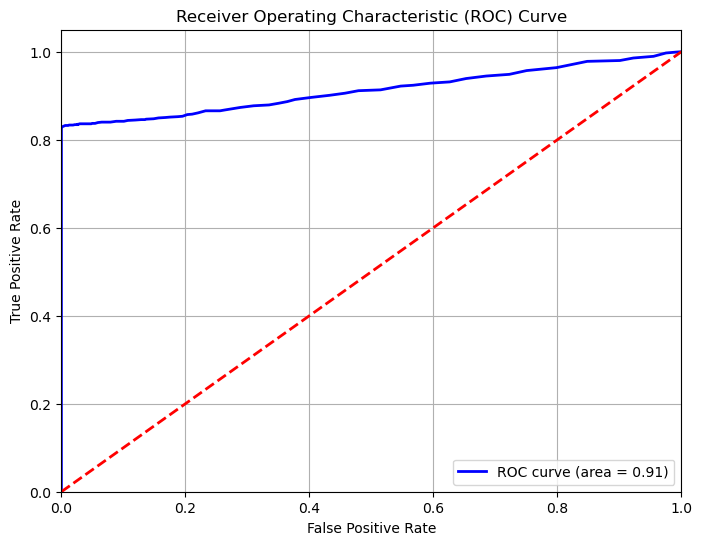

In [235]:
# My previous code for feature-target split and model training
X = random_forest_df[columns_to_keep]
y = random_forest_df['churned_customer']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The ROC curve being close to the top-left corner indicates that your model achieves a high true positive rate while maintaining a low false positive rate across various thresholds.